# Beispielsaufgabe

### CSV-Datei -Aufgabe

Ein Unternehmen hat Ihnen eine CSV-Datei namens sales_data.csv zur Verfügung gestellt. Diese Datei enthält Verkaufsdaten aus verschiedenen Filialen, die aufbereitet werden müssen, bevor sie in einem DataFrame gespeichert und analysiert werden können.

Die CSV-Datei hat das folgende Format:
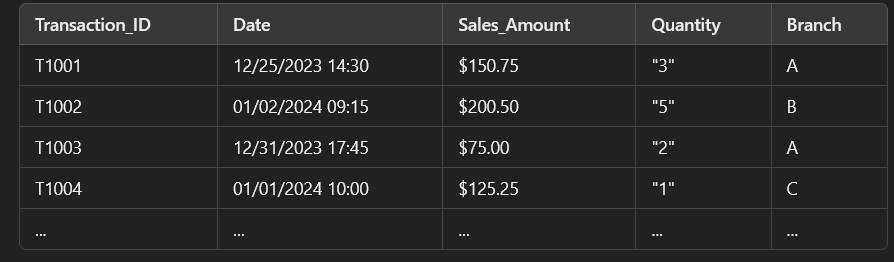

### Aufgabenstellung:

1. Lesen Sie die Datei sales_data.csv ein und konvertieren Sie die Daten in einen DataFrame.
2. Konvertieren Sie das Datumsformat in der Spalte Date in das Format YYYY-MM-DD HH:MM (z. B. 2023-12-25 14:30).
3. Entfernen Sie das Dollarzeichen aus der Spalte Sales_Amount und konvertieren Sie die Werte in numerische (float) Werte.
4. Konvertieren Sie die Spalte Quantity von einer Textdarstellung in numerische (int) Werte.
5. Geben Sie das bereinigte DataFrame aus und überprüfen Sie, ob die Konvertierungen erfolgreich waren, indem Sie den Datentyp jeder Spalte anzeigen.

In [8]:
import pandas as pd

# Datei mit dem richtigen Trennzeichen einlesen und Spaltennamen anzeigen
df = pd.read_csv("sales_data.csv", sep=";")
print("Spaltennamen:", df.columns)

# Prüfen, ob die Spalte 'Date' enthalten ist und keine Leerzeichen hat
df.columns = df.columns.str.strip()  # Entfernt potenzielle Leerzeichen aus Spaltennamen

# Datumsformat konvertieren
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')  # 'errors=coerce' konvertiert unpassende Formate zu NaT

# Dollarzeichen aus `Sales_Amount` entfernen und in Float konvertieren
df['Sales_Amount'] = df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)

# `Quantity` von Text zu Integer konvertieren
df['Quantity'] = df['Quantity'].astype(int)

# Bereinigtes DataFrame anzeigen
print(df.dtypes)


Spaltennamen: Index(['Transaction_ID', 'Date', 'Sales_Amount', 'Quantity', 'Branch'], dtype='object')
Transaction_ID            object
Date              datetime64[ns]
Sales_Amount             float64
Quantity                   int64
Branch                    object
dtype: object


In [10]:
df.head(5)

,Transaction_ID,Date,Sales_Amount,Quantity,Branch
0,T1001,2023-12-25 14:30:00,150.75,3,A
1,T1002,2024-01-02 09:15:00,200.50,5,B
2,T1003,2023-12-31 17:45:00,75.00,2,A
3,T1004,2024-01-01 10:00:00,125.25,1,C
4,T1005,2024-01-15 13:45:00,300.00,7,B


### Beispielsaufgabe Excel

Sie erhalten eine Excel-Datei namens sales_data.xlsx, die Verkaufsdaten aus verschiedenen Filialen enthält. Ihre Aufgabe besteht darin, die Daten aus dieser Datei zu bereinigen und vorzubereiten, bevor sie in einem DataFrame gespeichert und analysiert werden können.

Die Excel-Datei hat folgende Struktur:
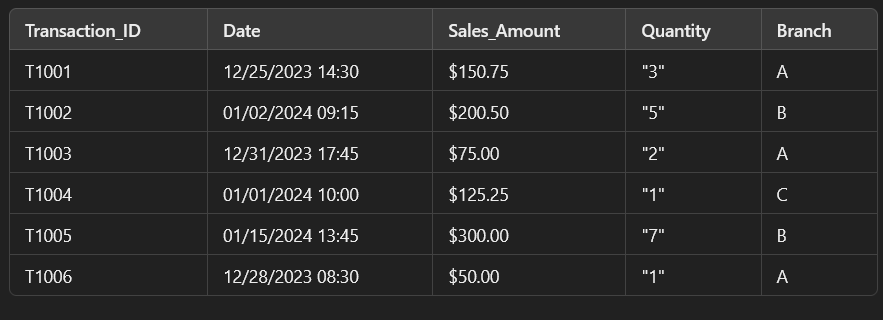

Aufgabenstellung:

1. Lesen Sie die Datei sales_data.xlsx ein und konvertieren Sie die Daten in einen DataFrame.
2. Konvertieren Sie das Datumsformat in der Spalte Date in das Format YYYY-MM-DD HH:MM (z. B. 2023-12-25 14:30).
4. Entfernen Sie das Dollarzeichen aus der Spalte Sales_Amount und konvertieren Sie die Werte in numerische (float) Werte.
5. Konvertieren Sie die Spalte Quantity von einer Textdarstellung in numerische (int) Werte.
6. Geben Sie das bereinigte DataFrame aus und überprüfen Sie, ob die Konvertierungen erfolgreich waren, indem Sie den Datentyp jeder Spalte anzeigen.

In [22]:
import pandas as pd

try:
    excel_file = pd.ExcelFile("sales_data.xlsx")
    print("Gefundene Arbeitsblätter:", excel_file.sheet_names)
except Exception as e:
    print("Fehler beim Laden der Excel-Datei:", e)


Gefundene Arbeitsblätter: ['Tabelle1']


In [23]:
import pandas as pd

# Datei einlesen
df = pd.read_excel("sales_data.xlsx")
print("Spaltennamen:", df.columns)

# Spaltennamen von Leerzeichen bereinigen
df.columns = df.columns.str.strip()

# 2. Datumsformat konvertieren
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# 3. Dollarzeichen aus `Sales_Amount` entfernen und in Float konvertieren
df['Sales_Amount'] = df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)

# 4. Anführungszeichen aus `Quantity` entfernen und zu Integer konvertieren
df['Quantity'] = df['Quantity'].replace('"', '', regex=True).astype(int)

# Bereinigtes DataFrame anzeigen
print(df.head())

# Überprüfen Sie die Datentypen der Spalten
print(df.dtypes)


Spaltennamen: Index(['Transaction_ID', 'Date', 'Sales_Amount', 'Quantity', 'Branch'], dtype='object')
  Transaction_ID                    Date  Sales_Amount  Quantity Branch
0          T1001 2023-12-25 14:30:00.000        150.75         3      A
1          T1002 2024-02-01 09:15:00.000        200.50         5      B
2          T1003 2023-12-31 17:45:00.000         75.00         2      A
3          T1004 2024-01-01 10:00:00.000        125.25         1      C
4          T1005 2024-01-02 09:59:59.995        125.26         1      A
Transaction_ID            object
Date              datetime64[ns]
Sales_Amount             float64
Quantity                   int64
Branch                    object
dtype: object


# Prüfungsaufgabe: Data Ingestion und SQLite

Hinweis: Diese Aufgabe überprüft Ihre Kenntnisse im Einlesen und Verarbeiten von Daten aus verschiedenen Dateiformaten sowie im Umgang mit einer SQLite-Datenbank.
Aufgabe

Sie haben verschiedene Datenquellen in den folgenden Formaten erhalten:

- CSV (sales_data.csv)
- JSON (customer_data.json)
- Excel (inventory_data.xlsx)

Außerdem soll eine SQLite-Datenbank verwendet werden, um die Daten zusammenzuführen und einfache Abfragen durchzuführen.

### Datenbeschreibung:

- sales_data.csv enthält Verkaufsdaten mit folgenden Spalten: Transaction_ID, Date, Sales_Amount, Quantity, Branch.
- customer_data.json enthält Kundeninformationen mit folgenden Feldern: Customer_ID, Name, City, Phone.
- inventory_data.xlsx enthält Lagerbestände mit folgenden Spalten: Product_ID, Product_Name, Stock_Quantity, Price.

### Aufgabenstellung:

1. Lesen Sie die Daten aus allen drei Dateien ein und bereinigen Sie die Daten:
    - Konvertieren Sie das Datumsformat in sales_data.csv in das Format YYYY-MM-DD.
    - Entfernen Sie das Dollarzeichen ($) aus Sales_Amount in sales_data.csv und konvertieren Sie die Werte in float.
    - Stellen Sie sicher, dass alle Werte in Quantity und Stock_Quantity als Integer vorliegen.

2. Speichern Sie die Daten in einer SQLite-Datenbank company_data.db mit folgenden Tabellen:
    - Sales für Verkaufsdaten
    - Customers für Kundendaten
    - Inventory für Lagerbestände

3. Erstellen Sie Abfragen in SQL, um Folgendes zu ermitteln:
    - Die durchschnittliche Sales_Amount für jede Filiale (Branch) in der Tabelle Sales.
    - Eine Liste aller Kunden (Name) aus der Tabelle Customers, die in der gleichen Stadt (City) leben wie die Filiale in der Tabelle Sales.
    - Die Gesamtmenge (Stock_Quantity) aller Produkte in der Tabelle Inventory.

4. Geben Sie die Ergebnisse der Abfragen in Pandas-DataFrames aus und zeigen Sie sie an.

In [ ]:
import pandas as pd
import sqlite3
import json

# 1. Daten einlesen und bereinigen

# Lesen der CSV-Datei
sales_df = pd.read_csv("sales_data.csv")
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
sales_df['Sales_Amount'] = sales_df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)
sales_df['Quantity'] = sales_df['Quantity'].astype(int)

# Lesen der JSON-Datei
with open("customer_data.json", "r") as f:
    customer_data = json.load(f)
customers_df = pd.json_normalize(customer_data)

# Lesen der Excel-Datei
inventory_df = pd.read_excel("inventory_data.xlsx")
inventory_df['Stock_Quantity'] = inventory_df['Stock_Quantity'].astype(int)

# 2. Speichern in SQLite-Datenbank
conn = sqlite3.connect("company_data.db")

# Tabellen erstellen und Daten einfügen
sales_df.to_sql('Sales', conn, if_exists='replace', index=False)
customers_df.to_sql('Customers', conn, if_exists='replace', index=False)
inventory_df.to_sql('Inventory', conn, if_exists='replace', index=False)

# 3. SQL-Abfragen ausführen

# Durchschnittliche Verkaufsmenge pro Filiale
avg_sales_query = "SELECT Branch, AVG(Sales_Amount) AS Avg_Sales FROM Sales GROUP BY Branch"
avg_sales_df = pd.read_sql(avg_sales_query, conn)
print("Durchschnittlicher Verkaufsbetrag pro Filiale:")
print(avg_sales_df)

# Kundenliste aus der gleichen Stadt wie die Filiale
customers_query = """
SELECT c.Name
FROM Customers c
JOIN Sales s ON c.City = s.Branch
"""
customers_city_df = pd.read_sql(customers_query, conn)
print("Kunden aus der gleichen Stadt wie die Filiale:")
print(customers_city_df)

# Gesamtmenge aller Produkte
stock_query = "SELECT SUM(Stock_Quantity) AS Total_Stock FROM Inventory"
total_stock_df = pd.read_sql(stock_query, conn)
print("Gesamtmenge aller Produkte im Lager:")
print(total_stock_df)

# Verbindung zur Datenbank schließen
conn.close()

## The END